In [1]:
library(tidyverse)
library(magrittr)
library(latex2exp)
library(gridExtra)
library(scales)
library(cowplot)
source("../src/cma-es-csa.R")
source("../src/cma-es-msr.R")
source("../src/cma-es-expth.R")
source("../src/cma-es-ja.R")
source("../src/cma-es-quant.R")
options(repr.plot.width=10, repr.plot.height=10)
source("../src/plot-utils.R")

── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 3.1.0       ✔ purrr   0.3.1  
✔ tibble  2.0.1       ✔ dplyr   0.8.0.1
✔ tidyr   0.8.2       ✔ stringr 1.4.0  
✔ readr   1.3.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Attaching package: ‘magrittr’

The following object is masked from ‘package:purrr’:

    set_names

The following object is masked from ‘package:tidyr’:

    extract


Attaching package: ‘gridExtra’

The following object is masked from ‘package:dplyr’:

    combine


Attaching package: ‘scales’

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:readr’:

    col_factor


Attaching package: ‘cowplot’

The following object is masked from ‘package:ggplot2’:

    ggsave



In [2]:
func = function(x) x[1]
methods = list(
    cma_es_csa,
    cma_es_ja,
    cma_es_msr,
    cma_es_expth,
    cma_es_quant)

lower = -100
upper = 100 
x0 = 100
CMA_flag = FALSE
alog10 = . %>% abs() %>% log10()

In [3]:
results_5d = 
    do_experiment(
        methods,
        func,
        5,
        x0,
        lower = lower,
        upper = upper,
        if_CMA = CMA_flag
    ) %>%
    rename_algs() %>%
    dplyr::mutate(Dim = 5)

In [4]:
results_10d = 
    do_experiment(
        methods,
        func,
        10,
        x0,
        lower = lower,
        upper = upper,
        if_CMA = CMA_flag
    ) %>%
    rename_algs()  %>%
    dplyr::mutate(Dim = 10)

In [5]:
results_30d = 
    do_experiment(
        methods,
        func,
        30,
        x0,
        lower = lower,
        upper = upper,
        if_CMA = CMA_flag
    ) %>%
    rename_algs()  %>%
    dplyr::mutate(Dim = 30)

In [6]:
results_50d = 
    do_experiment(
        methods,
        func,
        50,
        x0,
        lower = lower,
        upper = upper,
        if_CMA = CMA_flag
    ) %>%
    rename_algs() %>%
    dplyr::mutate(Dim = 50)

In [7]:
all_results = 
    dplyr::bind_rows(results_5d, results_10d, results_30d, results_50d)

In [8]:
p_d5 = 
    all_results %>%
    dplyr::filter(Dim == 5, t <= 400) %>%
    sigma_plot() + theme(legend.position =  'none') + ggtitle("n = 5")
p_d10 = 
    all_results %>%
    dplyr::filter(Dim == 10, t <= 400) %>%
    sigma_plot() + 
    theme(legend.position =  c(0.3, 0.7)) +
    ggtitle("n = 10") +
    ylab("")
p_d30 = 
    all_results %>%
    dplyr::filter(Dim == 30, t <= 400) %>%
    sigma_plot() + theme(legend.position = "none") + ggtitle("n = 30")
p_d50 = 
    all_results %>%
    dplyr::filter(Dim == 50, t <= 400) %>%
    sigma_plot() + 
    theme(legend.position = "none") +
    ggtitle("n = 50") +
    ylab("")

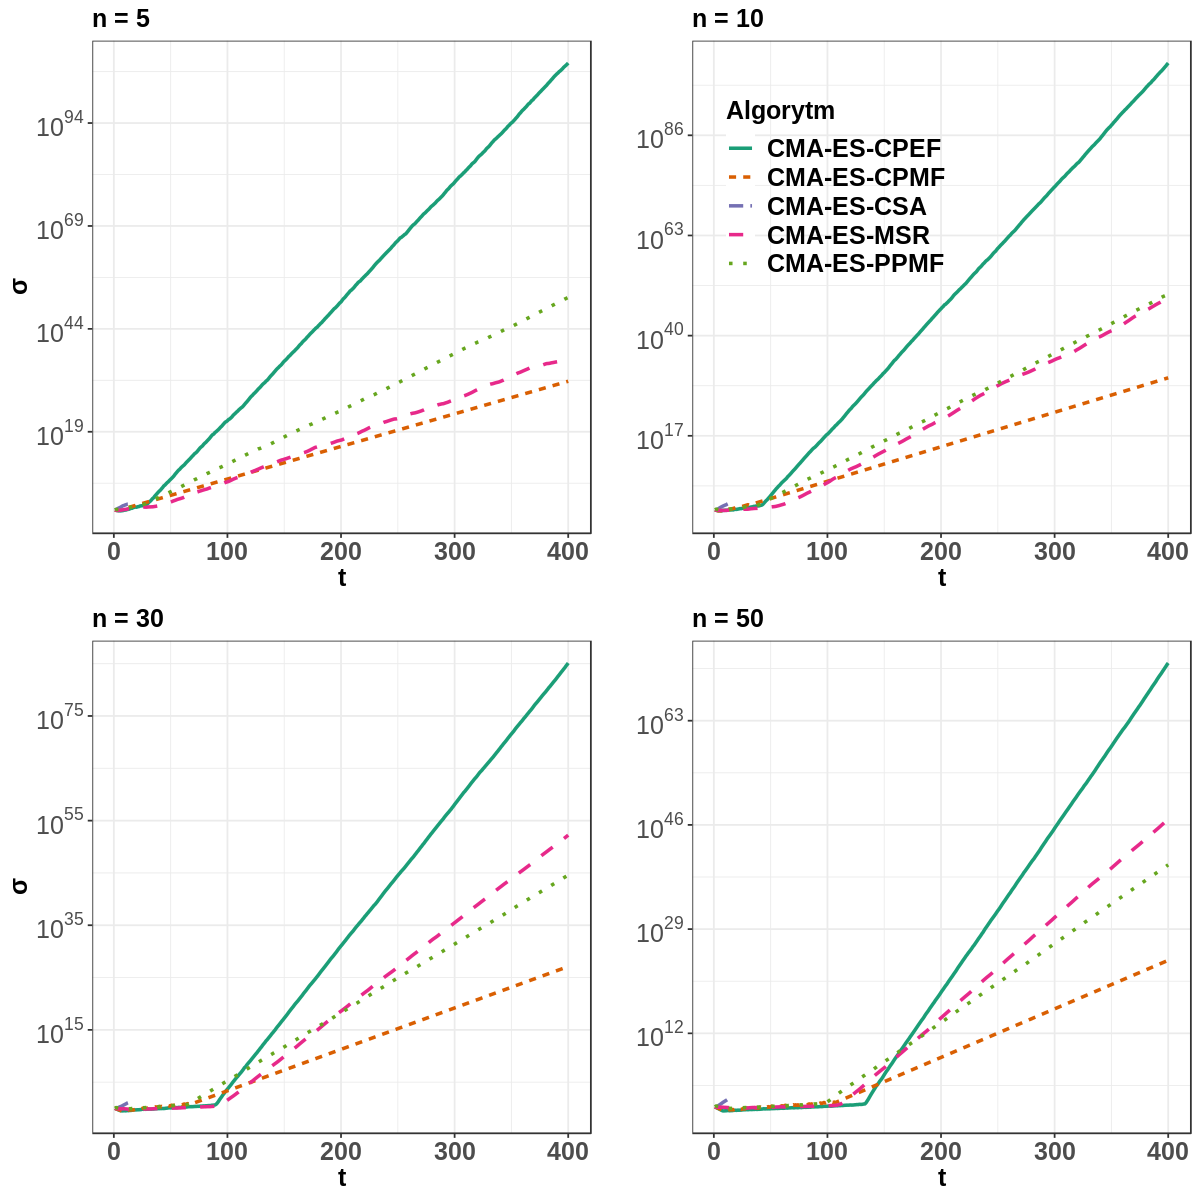

In [9]:
plot_grid(p_d5, p_d10, p_d30, p_d50)

In [10]:
best_d5 = 
    all_results %>%
    dplyr::filter(Dim == 5, t <= 400) %>%
    value_plot(.f = abs) + theme(legend.position =  'none') + ggtitle("n = 5")
best_d10 = 
    all_results %>%
    dplyr::filter(Dim == 10, t <= 400) %>%
    value_plot(.f = abs) + 
    theme(legend.position =  c(0.3, 0.7)) +
    ggtitle("n = 10") +
    ylab("")
best_d30 = 
    all_results %>%
    dplyr::filter(Dim == 30, t <= 400) %>%
    value_plot(.f = abs) + theme(legend.position = "none") + ggtitle("n = 30")
best_d50 = 
    all_results %>%
    dplyr::filter(Dim == 50, t <= 400) %>%
    value_plot(.f = abs) + 
    theme(legend.position = "none") +
    ggtitle("n = 50") +
    ylab("")

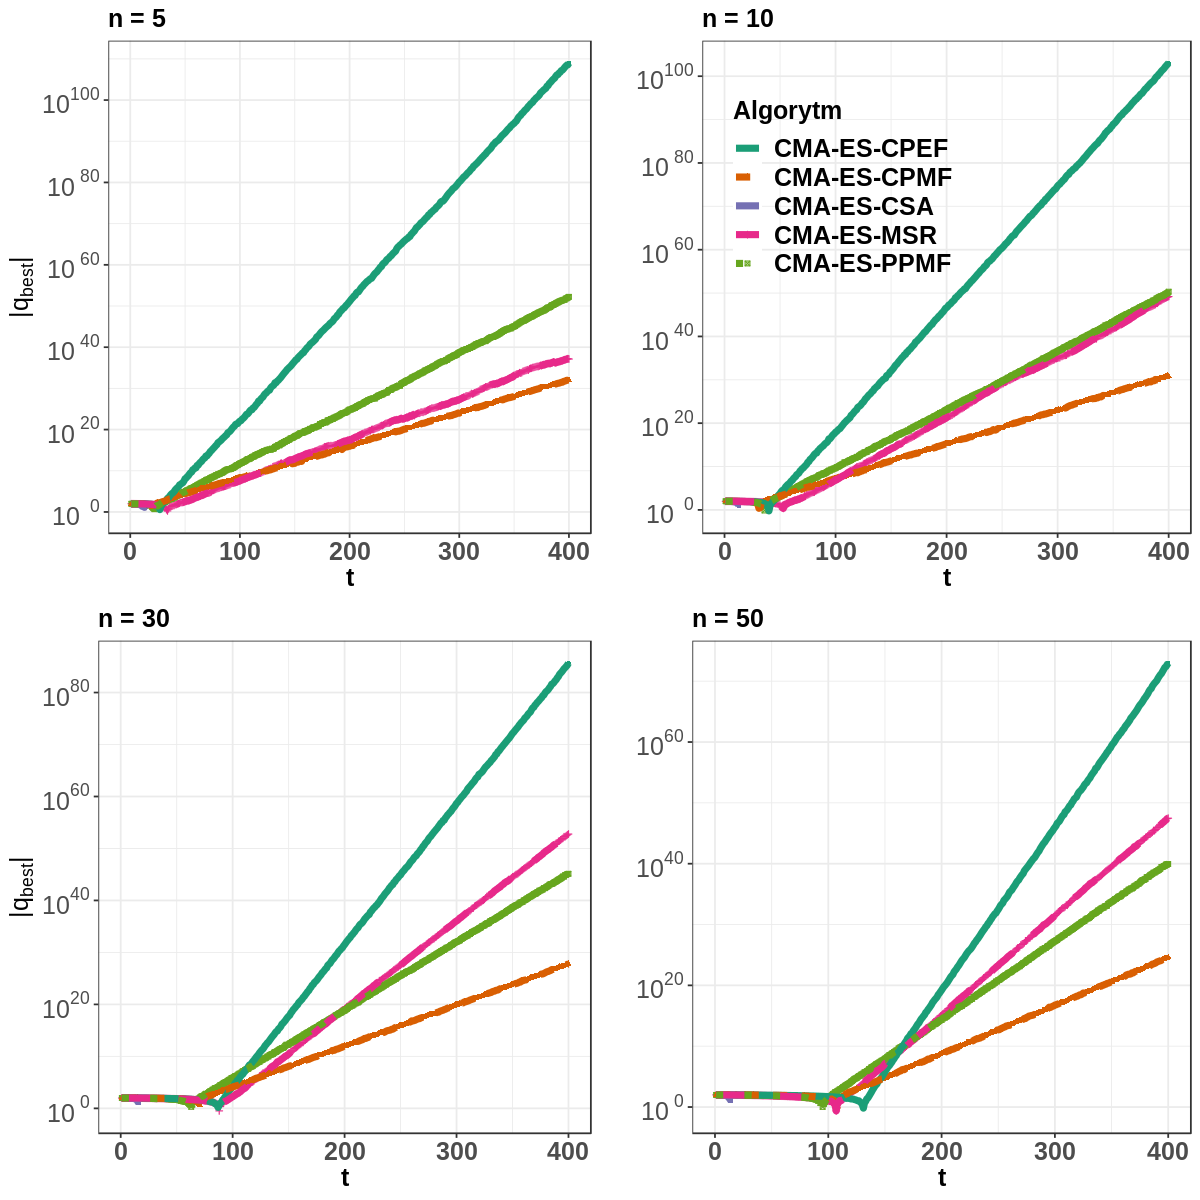

In [11]:
plot_grid(best_d5, best_d10, best_d30, best_d50)